## [Interpolacja](https://github.com/kzajac/Mownit2018/blob/master/Mownit-Lab5.ipynb)

In [22]:
using Polynomials
using Plots
using CSV
using DataFrames
using Statistics
using Interpolations

### Zadanie 1.
- Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny Lagrange'a . Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. 

Wzór na wielomian interpolacyjny Lagrange'a:

$ p_n(x) = \sum_{k=0}^n y_kl_k(x) $

$ l_k(x) = \prod_{\substack{i=0\\ i\neq k}}^n \frac{x-x_i}{x_k-x_i} $

Poniżej realizowane jest losowanie węzłów i zestawienie ich na wykresie wraz z wyliczonym wielomianem Lagrange'a.

In [1]:
x = 0:1:10
y = [rand() for a in x]

function computeL(k, X)
    x_k = X[k]
    X = [x for x in X if x != x_k]
    p = Poly([1.0])
    q = 1
    for x_i in X
        p = p * poly([x_i])
        # poly tworzy wielomian na podstawie miejsc zerowych
        q = q * (x_k - x_i)
    end
    (p / q)
end

function lagrange(X, Y)
    p = Poly([0])
    for k in 1:1:length(Y)
        p = p + (computeL(k, X) * Y[k])
    end
    p
end
pxl = lagrange(x, y)

Poly(0.5473295334944857 + 27.07717922468751*x - 75.55080292070188*x^2 + 85.15808228872956*x^3 - 51.24330744229487*x^4 + 18.336078452565708*x^5 - 4.088963619500101*x^6 + 0.5734602010852888*x^7 - 0.04914067146834195*x^8 + 0.002349106052463134*x^9 - 4.79726210994824e-5*x^10)

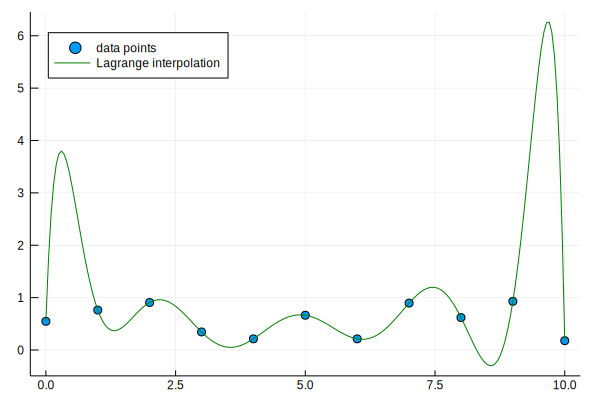

In [7]:
xs = 0.0:0.05:10.0
scatter(x, y,
    label = "data points",
    legend = :topleft)
plot!(xs, polyval(pxl, xs),
    color = :green,
    label = "Lagrange interpolation")

### Zadanie 2.
- Zrobic to samo dla metody Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

Wzór na wielomian interpolacyjny Newtona:

$ p_0(x) = y_0 $

$ p_k(x) = p_{k-1}(x) + c_k \prod_{i=0}^{k-1} (x-x_i) $

$ c_k = \frac{y_k-p_{k-1}(x_k)}{\prod_{i=0}^{k-1} (x_k-x_i)} $

In [8]:
function computeC(X, y_k, k, p_k)
    x_k = X[k]
    p = y_k - polyval(p_k, x_k)
    q = 1
    for i in 1:1:k-1
        q = q * (x_k - X[i])
    end
    (p / q)
end

function newton(X, Y, n)
    if n == 1
        Poly(float(Y[1]))
    else
        pp = newton(X, Y, n-1)
        c = computeC(X, Y[n], n, pp)
        poly([X[i] for i in 1:1:n-1]) * c + pp
    end
end

function newton(X, Y)
    newton(X, Y, length(Y))
end
pxn = newton(x,y)

Poly(0.5473295334944857 + 27.077179224713625*x - 75.55080292077568*x^2 + 85.15808228881373*x^3 - 51.24330744234672*x^4 + 18.336078452584946*x^5 - 4.088963619504607*x^6 + 0.5734602010859594*x^7 - 0.04914067146840336*x^8 + 0.0023491060524662914*x^9 - 4.797262109955204e-5*x^10)

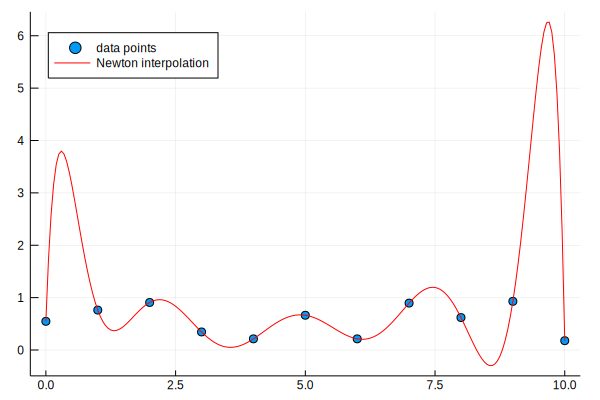

In [10]:
scatter(x, y,
    label = "data points",
    legend = :topleft)
plot!(xs, polyval(pxn, xs),
    color = :red,
    label = "Newton interpolation")

### Zadanie 3.
 - Zastosowac interpolację wielomianową z pakietu Polynomials do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

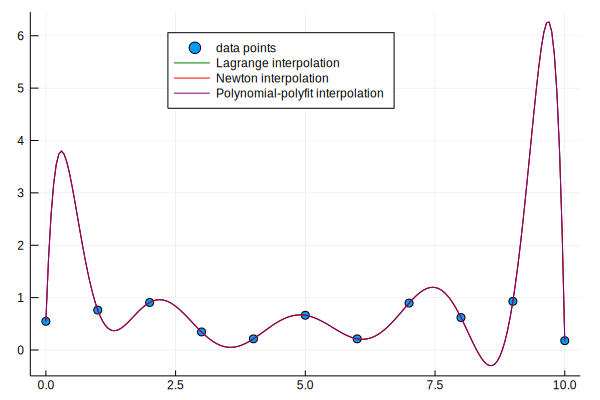

In [11]:
pxp = polyfit(x, y)
scatter(x, y,
    label = "data points",
    legend = :top)
plot!(xs, polyval(pxl, xs),
    color=:green,
    label = "Lagrange interpolation")
plot!(xs, polyval(pxn, xs),
    color=:red,
    label = "Newton interpolation")
plot!(xs, polyval(pxp, xs),
    color=:purple,
    label = "Polynomial-polyfit interpolation")

Zauważmy, że wykresy wielomianów pokrywają się. Dzieje się tak, gdyż są one równe; dla danych n+1 punktów istnieje __dokładnie jeden__ wielomian n-tego stopnia, który przez nie przechodzi.


### Zadanie 4.
- Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.

Dokonujemy po 10 pomiarów dla 250, 500, ..., 2000 losowych węzłów, mierząc czasy po kolei każdą z metod.

_Aby uniknąć długich czasów obliczeń, repozytorium zostało wyposażone w przykładowe wyniki. Można je załadować kilka komórek niżej, odkomentowując odpowiednie linijki kodu._

In [12]:
types=[];sizes=[];times=[]
range = 250:250:2000
for r in range
    x = 0:1:r
    for i in 1:1:10
        y = rand(Int, r+1)
        push!(types, "lagrange")
        push!(sizes, r)
        push!(times, @elapsed lagrange(x,y))
        push!(types, "newton")
        push!(sizes, r)
        push!(times, @elapsed newton(x,y))
        push!(types, "polyfit")
        push!(sizes, r)
        push!(times, @elapsed polyfit(x,y))
    end
end
df = DataFrame([types,sizes,times],[:Types,:Sizes,:Times])

,Types,Sizes,Times
,Any,Any,Any
1,lagrange,250,0.473507
2,newton,250,0.134555
3,polyfit,250,2.26615
4,lagrange,250,0.187251
5,newton,250,0.00707153
6,polyfit,250,0.00416059
7,lagrange,250,0.185578
8,newton,250,0.00724634
9,polyfit,250,0.00921943


In [16]:
# df = CSV.read("backup.csv")

Grupujemy dane, wyliczając średnie czasów i średnie odchylenia.

In [17]:
dfex = by(df, [:Types],
    df1 -> by(df1, [:Sizes], 
        df2 -> DataFrame(
            Mean = mean(df2[:Times]),
            StdDeviation = sqrt(var(df2[:Times])))))

,Types,Sizes,Mean,StdDeviation
,String⍰,Int64⍰,Float64,Float64
1,lagrange,250,0.214873,0.0909346
2,lagrange,500,1.27595,0.104498
3,lagrange,750,3.85522,0.439803
4,lagrange,1000,7.84673,0.373553
5,lagrange,1250,15.1007,0.634425
6,lagrange,1500,25.5317,1.39915
7,lagrange,1750,41.2411,2.50311
8,lagrange,2000,60.6692,2.54317
9,newton,250,0.0196646,0.0403702


Przedstawiam dane na wykresie.

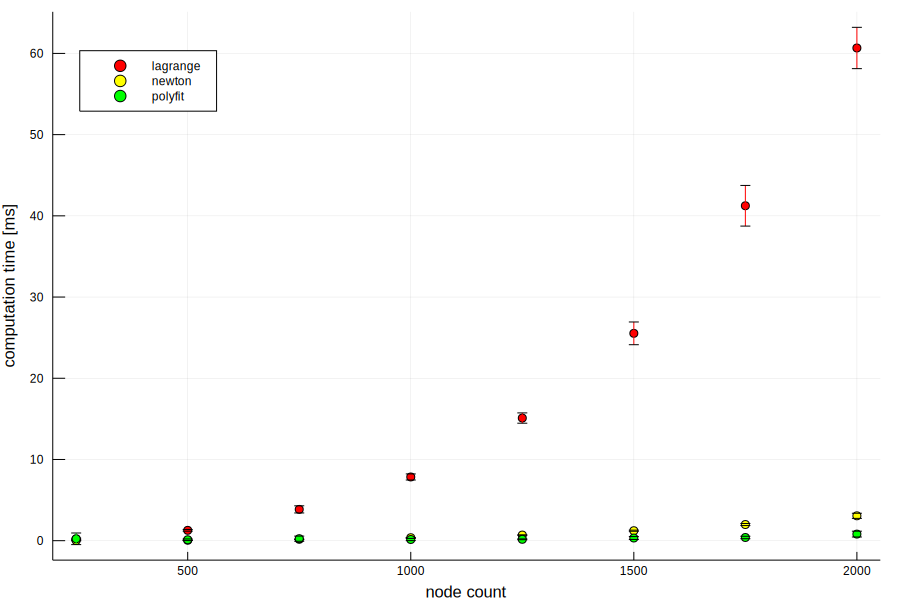

In [18]:
scatter(
        dfex[dfex[:Types].== "lagrange", :][:Sizes],
        dfex[dfex[:Types].== "lagrange", :][:Mean],
        yerr = dfex[dfex[:Types].== "lagrange", :][:StdDeviation],
        label = "lagrange",
        color = :red,
        legend = :topleft,
        size = (900,600),
        xlabel = "node count",
        ylabel = "computation time [ms]"
    )
scatter!(
        dfex[dfex[:Types].== "newton", :][:Sizes],
        dfex[dfex[:Types].== "newton", :][:Mean],
        yerr = dfex[dfex[:Types].== "newton", :][:StdDeviation],
        label = "newton",
        color = :yellow
    )
scatter!(
        dfex[dfex[:Types].== "polyfit", :][:Sizes],
        dfex[dfex[:Types].== "polyfit", :][:Mean],
        yerr = dfex[dfex[:Types].== "polyfit", :][:StdDeviation],
        label = "polyfit",
        color = :lime
    )


Łatwo zauważyć, że metoda Lagrange'a ma gorszą złożoność od pozostałych metod. Widać, że metoda Newtona oraz algorytm polyfit są do siebie zbliżone, przedstawię poglądowo ich wyniki na przeskalowanym wykresie.

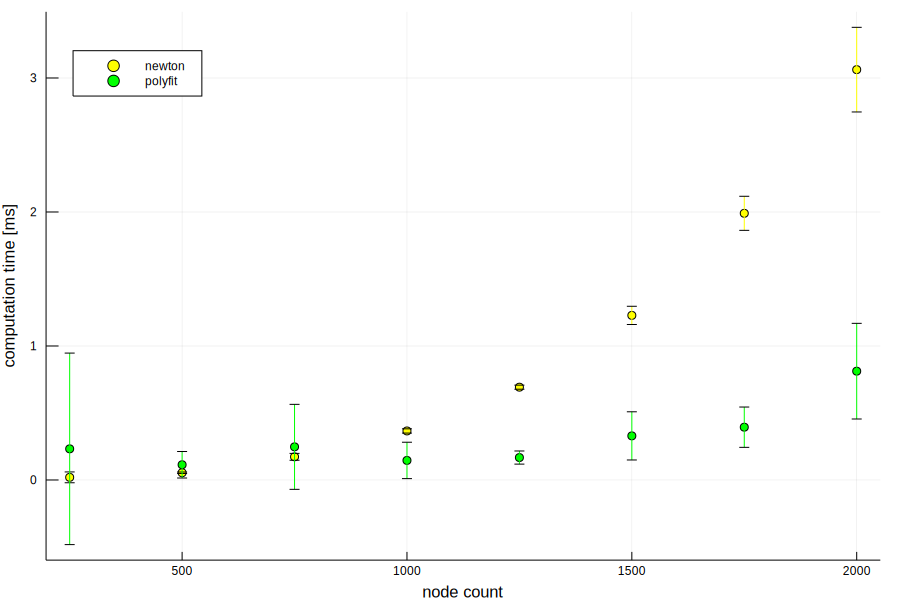

In [19]:
scatter(
        dfex[dfex[:Types].== "newton", :][:Sizes],
        dfex[dfex[:Types].== "newton", :][:Mean],
        yerr = dfex[dfex[:Types].== "newton", :][:StdDeviation],
        label = "newton",
        color = :yellow,
        legend = :topleft,
        size = (900,600),
        xlabel = "node count",
        ylabel = "computation time [ms]"
    )
scatter!(
        dfex[dfex[:Types].== "polyfit", :][:Sizes],
        dfex[dfex[:Types].== "polyfit", :][:Mean],
        yerr = dfex[dfex[:Types].== "polyfit", :][:StdDeviation],
        label = "polyfit",
        color = :lime
    )

_Wyjątkowo duże odchylenie dla polyfit wielkości 250 spowodowane jest prawdopodobnie ładowaniem biblioteki - dokładnie **pierwszy** z wyników jest mocno zniekształcony._

### Zadanie 5.
- Poeksperymentowac z interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane), narysowac wykresy i porownac z wykresami interpolacji wielomianowej.
- Zademonstrowac efekt Rungego. 

In [23]:
x = 1:1:10
y = [rand() for a in x]
pxp = polyfit(x,y)
ixc = CubicSplineInterpolation(x,y)
ixl = interpolate(y, BSpline(Linear()))
xs = 1.0:0.05:10.0

1.0:0.05:10.0

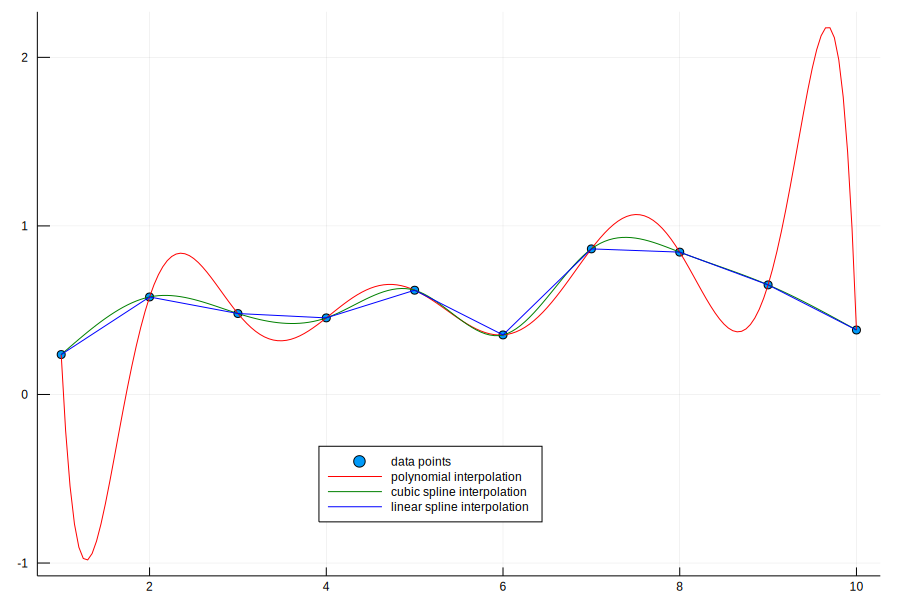

In [24]:
scatter(x, y,
    label = "data points",
    legend = :bottom,
    size = (900,600))
plot!(xs, polyval(pxp, xs),
    label = "polynomial interpolation",
    color = :red)
plot!(xs, [ixc(i) for i in xs],
    label = "cubic spline interpolation",
    color = :green)
plot!(xs, [ixl(i) for i in xs],
    label = "linear spline interpolation",
    color = :blue)

Dobrze widać na wykresie, że o ile przybliżanie wielomianem działa po naszej myśli dla większości węzłów, o tyle na jednym z końców kompletnie nam się rozjeżdża. Zobaczmy, co się stanie dla większej ilości węzłów:

In [25]:
x = 1:1:15
y = [rand() for a in x]
pxp = polyfit(x,y)
ixc = CubicSplineInterpolation(x,y)
ixl = interpolate(y, BSpline(Linear()))
xs = 1.0:0.05:15.0

1.0:0.05:15.0

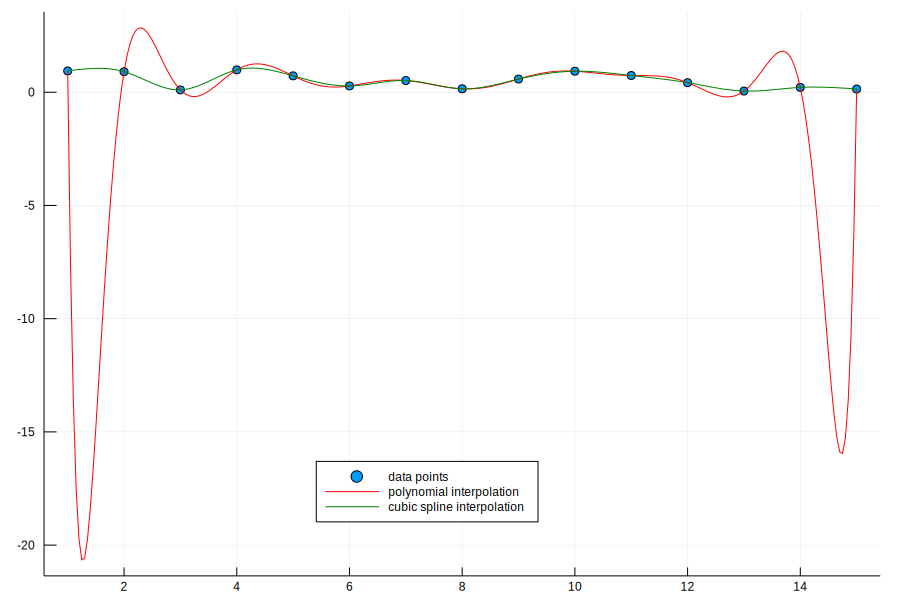

In [27]:
scatter(x, y,
    label = "data points",
    legend = :bottom,
    size = (900,600))
plot!(xs, polyval(pxp, xs),
    label = "polynomial interpolation",
    color = :red)
plot!(xs, [ixc(i) for i in xs],
    label = "cubic spline interpolation",
    color = :green)

Można powiedzieć, że dla tego przypadku (15 węzłów) odchylenia zwalają z nóg (sięgają ponad 2000%)! To zjawisko nazywamy efektem Rungego. Jest głównym powodem, dlaczego nie powinno się interpolować wielomianami dla więcej niż kilku węzłów. 